# Import Library dan Load Data

In [2]:
import pandas as pd

# Load dataset
file_path = 'dataset.xlsx'
data = pd.ExcelFile(file_path)

# Load sheets DATA IB dan DATA IK
data_ib = data.parse('DATA IB')
data_ik = data.parse('DATA IK')

# Cek nama kolom dalam DATA IB dan DATA IK
print("Kolom di DATA IB:", data_ib.columns)
print("Kolom di DATA IK:", data_ik.columns)


Kolom di DATA IB: Index(['Unnamed: 0', 'Unnamed: 1', 'angk', 'status_akhir', 'rencana_berangkat',
       'rencana_kembali', 'desc', 'tujuan', 'realisasi_berangkat',
       'realisasi_kembali', 'akumulasi_skor', 'nilaiPerilaku'],
      dtype='object')
Kolom di DATA IK: Index(['Unnamed: 0', 'Unnamed: 1', 'angk', 'status_akhir', 'rencana_berangkat',
       'rencana_kembali', 'tujuan', 'realisasi_berangkat',
       'realisasi_kembali'],
      dtype='object')


In [3]:
# Pilih kolom yang relevan dari DATA IB (kolom 'desc' sebagai alasan)
data_ib_cleaned = data_ib[['desc']].rename(columns={'desc': 'reason'})

# Menandai sumber data sebagai IB
data_ib_cleaned['source'] = 'IB'

# Tampilkan hasil pembersihan dari DATA IB
print(data_ib_cleaned.head())


                     reason source
0  Ingin Bertemu Orang Tua      IB
1  Ingin bertemu orang tua      IB
2        Libur akhir tahun      IB
3            libur semester     IB
4         Bertemu Orang Tua     IB


In [4]:
# Bersihkan teks alasan
data_ib_cleaned['reason_cleaned'] = data_ib_cleaned['reason'].str.lower().str.strip()

# Tampilkan hasil pembersihan
print(data_ib_cleaned.head())


                     reason source           reason_cleaned
0  Ingin Bertemu Orang Tua      IB  ingin bertemu orang tua
1  Ingin bertemu orang tua      IB  ingin bertemu orang tua
2        Libur akhir tahun      IB        libur akhir tahun
3            libur semester     IB           libur semester
4         Bertemu Orang Tua     IB        bertemu orang tua


# Rule-based Classification

pendekatan yang digunakan untuk mengelompokkan data berdasarkan kata kunci atau aturan tertentu. Dalam konteks ini, kita mengelompokkan alasan mahasiswa ke dalam kategori yang lebih relevan berdasarkan kata-kata atau frasa yang ada dalam alasan tersebut.

Menentukan aturan klasifikasi: Kita membuat fungsi yang mendefinisikan aturan untuk memeriksa apakah alasan mahasiswa mengandung kata kunci tertentu, dan berdasarkan itu, kita mengklasifikasikan alasan tersebut ke dalam kategori tertentu.

Mengelompokkan alasan: Fungsi ini diterapkan ke setiap alasan dalam data untuk menentukan kategori mana yang relevan.

In [6]:
# Fungsi untuk klasifikasi alasan berdasarkan kata kunci
def classify_reason(reason):
    # Jika alasan terkait dengan keluarga, orang tua, atau rumah
    if any(keyword in reason for keyword in ['keluarga', 'ortu', 'orang tua', 'rumah', 'family']):
        return 'Keluarga & Transportasi'
    # Jika alasan terkait dengan transportasi atau perjalanan
    elif any(keyword in reason for keyword in ['mobil', 'kendaraan', 'jalan-jalan', 'transport', 'travel']):
        return 'Transportasi & Liburan'
    # Jika alasan terkait dengan pendidikan atau studi
    elif any(keyword in reason for keyword in ['belajar', 'pendidikan', 'studi', 'kuliah']):
        return 'Pendidikan'
    # Jika alasan terkait dengan liburan atau wisata
    elif any(keyword in reason for keyword in ['liburan', 'wisata', 'jalan-jalan', 'holiday']):
        return 'Liburan & Wisata'
    # Jika alasan terkait dengan pekerjaan atau karir
    elif any(keyword in reason for keyword in ['kerja', 'pekerjaan', 'meeting', 'conference']):
        return 'Pekerjaan & Karir'
    # Jika alasan tidak sesuai dengan kategori di atas, masukkan ke 'Lainnya'
    else:
        return 'Lainnya'


In [7]:
# Terapkan fungsi classify_reason untuk mengklasifikasikan setiap alasan
data_ib_cleaned['category'] = data_ib_cleaned['reason_cleaned'].apply(classify_reason)

# Tampilkan hasil kategori
print(data_ib_cleaned.head())


                     reason source           reason_cleaned  \
0  Ingin Bertemu Orang Tua      IB  ingin bertemu orang tua   
1  Ingin bertemu orang tua      IB  ingin bertemu orang tua   
2        Libur akhir tahun      IB        libur akhir tahun   
3            libur semester     IB           libur semester   
4         Bertemu Orang Tua     IB        bertemu orang tua   

                  category  
0  Keluarga & Transportasi  
1  Keluarga & Transportasi  
2                  Lainnya  
3                  Lainnya  
4  Keluarga & Transportasi  


In [8]:
# Tampilkan alasan yang masuk ke kategori 'Lainnya'
lainnya_data = data_ib_cleaned[data_ib_cleaned['category'] == 'Lainnya']

# Tampilkan 10 alasan pertama yang masuk kategori 'Lainnya'
print(lainnya_data['reason_cleaned'].head(10))


2                              libur akhir tahun
3                                 libur semester
5                 mengerjakan tugas proyek akhir
6                 mengerjakan tugas proyek akhir
7           upaya it del dalam mencegah covid 19
8     bertemu dengan orangtua dan persiapan mbkm
18                              bertemu orangtua
22                             libur akhir tahun
23                                libur semester
25                mengerjakan tugas proyek akhir
Name: reason_cleaned, dtype: object


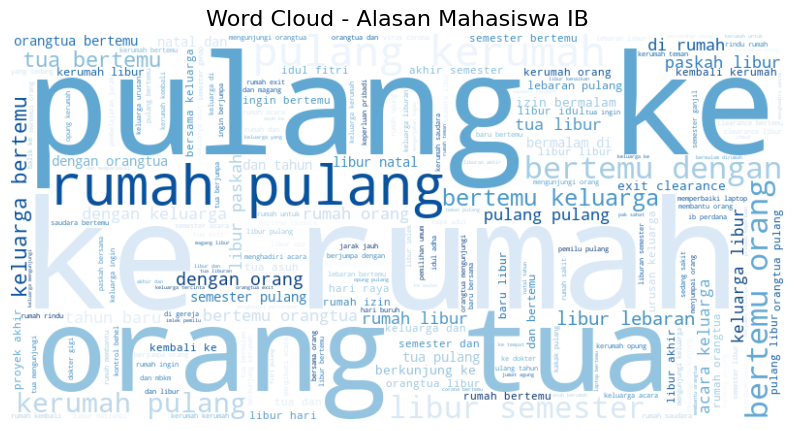

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua alasan menjadi satu teks
all_reasons = ' '.join(data_ib_cleaned['reason_cleaned'])

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(all_reasons)

# Tampilkan word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Alasan Mahasiswa IB", fontsize=16)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2992\1841286034.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="Set2")


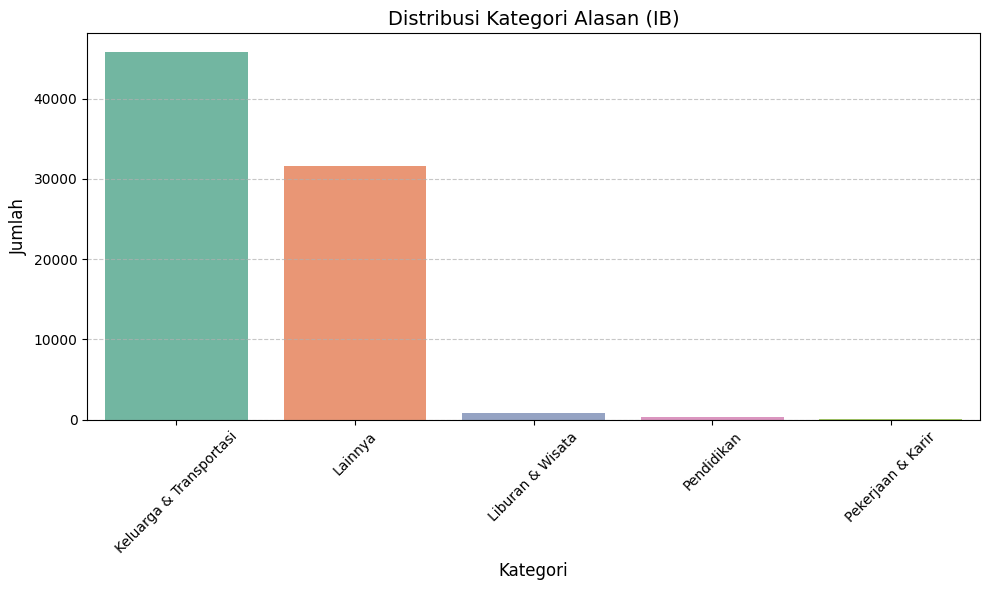

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah alasan berdasarkan kategori
category_counts = data_ib_cleaned['category'].value_counts()

# Visualisasi distribusi kategori
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="Set2")
plt.title("Distribusi Kategori Alasan (IB)", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


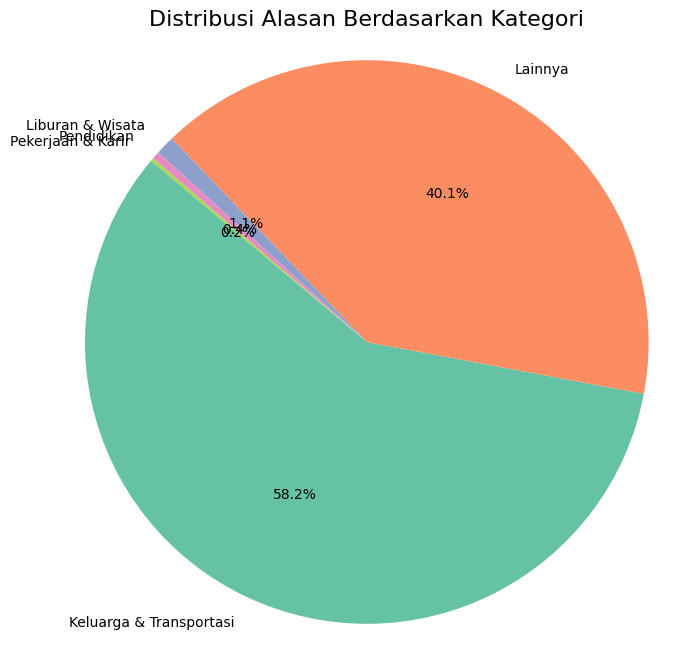

In [13]:
# Hitung jumlah kategori setelah klasifikasi
category_counts = data_ib_cleaned['category'].value_counts()

# Pie chart untuk distribusi kategori
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(category_counts)))
plt.title("Distribusi Alasan Berdasarkan Kategori", fontsize=16)
plt.axis('equal')
plt.show()


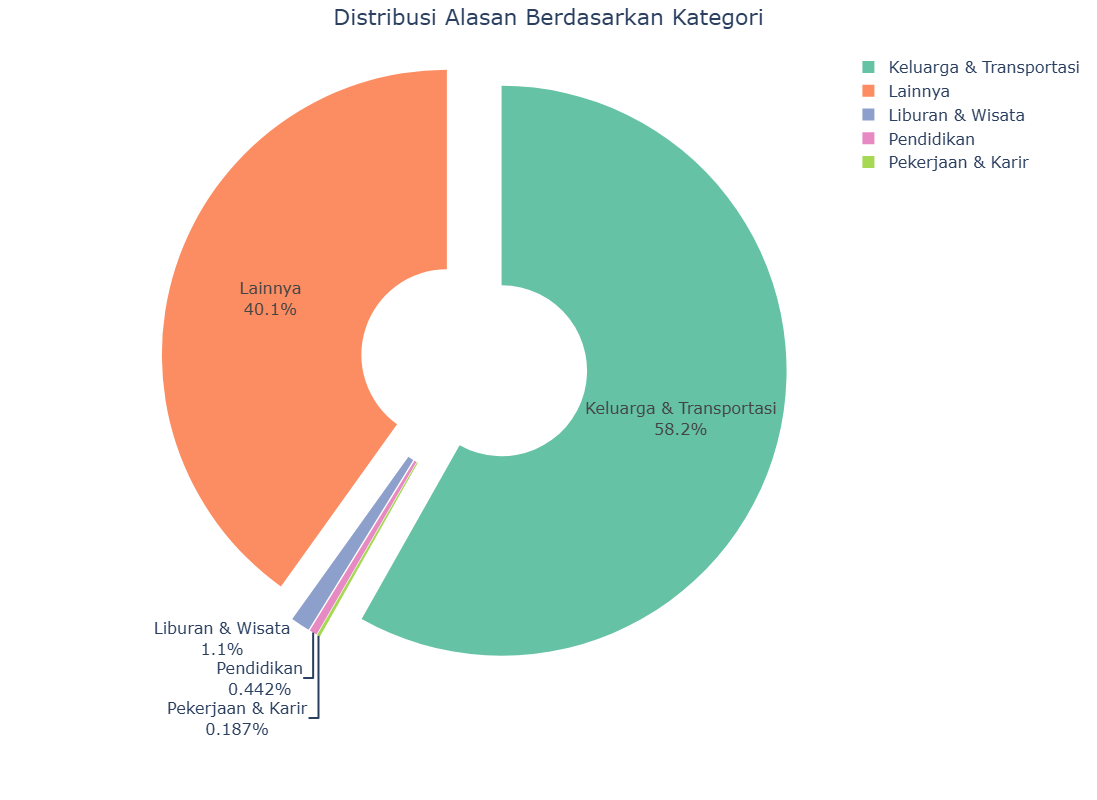

In [18]:
import plotly.express as px

# Hitung jumlah kategori
category_counts = data_ib_cleaned['category'].value_counts()

# Buat DataFrame dari kategori dan jumlah
category_df = category_counts.reset_index()
category_df.columns = ['category', 'count']

# Buat pie chart interaktif
fig = px.pie(category_df, 
             names='category', 
             values='count', 
             title='Distribusi Alasan Berdasarkan Kategori',
             color='category', 
             color_discrete_sequence=px.colors.qualitative.Set2,
             labels={'category': 'Alasan', 'count': 'Jumlah'},
             hole=0.3)  # Hole untuk donut chart (opsional)

# Tampilkan pie chart interaktif dengan ukuran yang lebih besar
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1, 0.1])  # Tarik beberapa bagian agar lebih jelas
fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},  # Center the title
    width=1000,  # Lebar chart
    height=800,  # Tinggi chart
    font=dict(size=16),  # Ukuran font untuk label
    margin=dict(t=50, b=50, l=50, r=50)  # Margin untuk memberi ruang
)

# Tampilkan chart interaktif
fig.show()
